In [1]:
import sys
#Change to own path
sys.path.insert(0, "/home/npatzlaff/Documents/rewiring-effects/")
from funcs.base import *
from tqdm import tqdm

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Checking the effects of weight variance on rewiring impact
## First for low variance

In [12]:
n_runs = 1

ex_frs = []
in_frs = []

stats = np.zeros((8,n_runs))

#analytical correlations
ana_r_e = np.zeros((4,n_runs))
ana_r_i = np.zeros((4,n_runs))

#Actual correlations
cor_e = np.zeros((5, 5, n_runs))
cor_i = np.zeros((5,5,n_runs))

weights = []

#get example spike trains for plotting
[i_e, t_e, i_i, t_i] = simulator(N=1000, EI_ratio=0.5, E_H=30*mV, I_H=30*mV,
                                 ee_mi = 1.7, ei_mi=1.7,ie_mi = 12, ii_mi=12, 
                                 report=None)

for i in tqdm(range(n_runs)):
    #Run rewiring simulation
    temp_ex_fr, temp_in_fr, temp_weights, temp_stats = rewiring_dynamics(N=1000, EI_ratio=0.5,  
                                                                         ee_mi = 1.7, ei_mi=1.7,
                                                                         ie_mi = 12, ii_mi=12, 
                                                                         E_H=30*mV, I_H=30*mV,
                                                                         report=None)
    
    ex_frs.append(temp_ex_fr)
    in_frs.append(temp_in_fr)
    weights.append(temp_weights)
    
    #Calculate correlations
    cor_e[:,:,i] = np.corrcoef(temp_ex_fr)
    cor_i[:,:,i] = np.corrcoef(temp_in_fr)
    stats[:,i] = temp_stats
    
    #Calculate analytical correlations
    for ii in range(4):
        r = analytic_correlation(temp_weights[ii][0], temp_ex_fr[ii], temp_weights[ii+1][0], temp_ex_fr[ii+1], 
                                temp_weights[ii][2], temp_in_fr[ii], temp_weights[ii+1][2], temp_in_fr[ii+1])
        ana_r_e[ii,i] = r

    for ii in range(4):
        r = analytic_correlation(temp_weights[ii][1], temp_ex_fr[ii], temp_weights[ii+1][1], temp_ex_fr[ii+1], 
                                temp_weights[ii][3], temp_in_fr[ii], temp_weights[ii+1][3], temp_in_fr[ii+1])
        ana_r_i[ii,i] = r

100%|██████████| 1/1 [00:45<00:00, 45.08s/it]


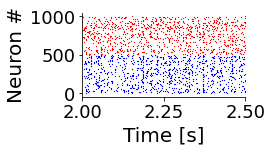

In [13]:
#Raster plot of spikes

scaling=0.75
fig, raster_plot = plt.subplots(1,1,figsize=(11.69/3*scaling, 16.54/8*scaling))

raster_plot.plot(t_e/1000, i_e, "b*", ms=0.7)
raster_plot.plot(t_i/1000, i_i+500, "r*", ms=0.7)
raster_plot.set_xbound([2,2.5])
raster_plot.set_xlabel("Time [s]", fontsize=20)
raster_plot.set_ylabel("Neuron #", fontsize=20)
raster_plot.set_yticks(np.arange(0,1100,500))
raster_plot.set_xticks(np.arange(2,2.6,0.25))
for tick in raster_plot.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in raster_plot.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)

sns.despine()

(0.0, 20.0)

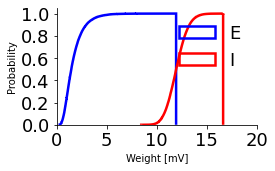

In [5]:
#Cumulative histogram of weights

#Make weight list into np.array
excitatory_weights = weights[0][0][0]
inhibitory_weights = weights[0][0][2]
for i in range(n_runs-1):
    excitatory_weights = np.concatenate((excitatory_weights, weights[i+1][0][0]))
    inhibitory_weights = np.concatenate((inhibitory_weights, weights[i+1][0][2]))
    
#Plot params
scaling=0.87

#hist params
bins=10000
density=True
colours = ["b", "r"]
histtype="step"
xticks=np.arange(0,25,5)
yticks=np.arange(0,1.1,0.2)
linewidth = 2.5
stacked = True
cum = True

fig, axs = plt.subplots(1,1,figsize=(11.69/2.9*scaling, 16.54/6.5*scaling))

plt.tight_layout( w_pad=1.7, h_pad=3)
plt.rcParams['axes.labelsize'] = 20

axs.hist(excitatory_weights[excitatory_weights!=0], bins=bins, density=density, color=colours[0], histtype=histtype,
        linewidth=linewidth, label="E", stacked=stacked, cumulative=cum)
axs.hist(inhibitory_weights[inhibitory_weights!=0], bins=bins, density=density, color=colours[1], histtype=histtype,
        linewidth=linewidth, label="I", stacked=stacked, cumulative=cum)
axs.legend(fontsize=18, frameon=False)

axs.set_xlabel("Weight [mV]")
axs.set_ylabel("Probability")

axs.set_xticks(xticks)
axs.set_yticks(yticks)

for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
sns.despine()
axs.set_xlim([0,20])

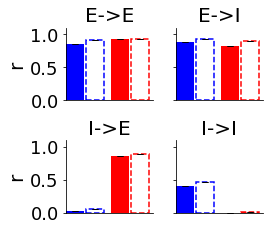

In [7]:
#Plot mean correlations; Result should be as expected with high impact of inhibitory rewiring

scaling=0.86
#Log-normal correlations
ex_cor = np.mean(cor_e, axis=2)
in_cor = np.mean(cor_i, axis=2)
ex_cor_std = np.std(cor_e, axis=2)
in_cor_std = np.std(cor_i, axis=2)

mean_ana_r_e = np.mean(ana_r_e, axis=1)
mean_ana_r_i = np.mean(ana_r_i, axis=1)
std_ana_r_e = np.std(ana_r_e, axis=1)
std_ana_r_i = np.std(ana_r_i, axis=1)

fig, cor_plots = plt.subplots(2,2,figsize=(11.69/2.9*scaling, 16.54/4.5*scaling), sharex=True, sharey=True)

plt.tight_layout( w_pad=0.75, h_pad=3)
plt.rcParams['axes.labelsize'] = 20


#cor_plots params
gap=0.2
a_gap=0.05
width = [0.5, 0.5]
a_width=[0.5,0.5]
error_kw = {"lw":2}
capsize=3
align="edge"
ylim=[0,1.1]
yticks = np.arange(0,1.1, 0.5)
fc = (0,0,0,0)
ec = ["b", "r"]
ls="dashed"
lw=1.5
position_0 = 0
position_1 = position_0+width[0]+a_gap+a_width[0]+gap
positions = [position_0, position_1]
a_positions = [position_0+width[0]+a_gap, position_1+width[1]+a_gap]
xlim = [position_0, a_positions[1]+a_width[1]+0.1]
xticks=[]

cor_plots[0,0].bar(positions,[ex_cor[0][1], in_cor[0][1]], 
              yerr=[ex_cor_std[0][1], in_cor_std[0][1]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[0,0].bar(a_positions, [mean_ana_r_e[0], mean_ana_r_i[0]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[0], std_ana_r_i[0]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[0,0].set_ylim(ylim)
cor_plots[0,0].set_xlim(xlim)
cor_plots[0,0].set_yticks(yticks)
cor_plots[0,0].set_xticks(xticks)
cor_plots[0,0].set_title("E->E", fontsize=20)

cor_plots[0,1].bar(positions,[ex_cor[1][2], in_cor[1][2]], 
              yerr=[ex_cor_std[1][2], in_cor_std[1][2]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[0,1].bar(a_positions, [mean_ana_r_e[1], mean_ana_r_i[1]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[1], std_ana_r_i[1]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[0,1].set_ylim(ylim)
cor_plots[0,1].set_xlim(xlim)
cor_plots[0,1].set_title("E->I", fontsize=20)

cor_plots[1,0].bar(positions,[ex_cor[2][3], in_cor[2][3]], 
              yerr=[ex_cor_std[2][3], in_cor_std[2][3]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[1,0].bar(a_positions, [mean_ana_r_e[2], mean_ana_r_i[2]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[2], std_ana_r_i[2]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[1,0].set_ylim(ylim)
cor_plots[1,0].set_xlim(xlim)
cor_plots[1,0].set_title("I->E", fontsize=20)

cor_plots[1,1].bar(positions,[ex_cor[3][4], in_cor[3][4]], 
              yerr=[ex_cor_std[3][4], in_cor_std[3][4]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[1,1].bar(a_positions, [mean_ana_r_e[3], mean_ana_r_i[3]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[3], std_ana_r_i[3]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[1,1].set_ylim(ylim)
cor_plots[1,1].set_xlim(xlim)
cor_plots[1,1].set_title("I->I", fontsize=20)

for tick in cor_plots[0,0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in cor_plots[1,0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
cor_plots[0,0].set_ylabel("r", fontsize=20)
cor_plots[1,0].set_ylabel("r", fontsize=20)

sns.despine()

In [ ]:
#Violinplots of stats; Increase n_runs above if want to plot meaningfully

#From stackoverflow; for calculating whiskers
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

#Change variance to STD
stats[1,:] = np.sqrt(stats[1,:])
stats[3,:] = np.sqrt(stats[3,:])

scaling=0.86
fig, axes = plt.subplots(2,2, figsize=(11.69/2.9*scaling, 16.54/4.5*scaling))
plt.tight_layout( w_pad=5, h_pad=1)
plt.rcParams['axes.labelsize'] = 20

stat_pairs = [(4,5), (1,3), (6,7), (0,2)]
stat_labels = ["$\overline{CV}$", "STD of FR \n [Hz]", "$\overline{K}$", "$\overline{FR}$ [Hz]"]

quartile1, medians, quartile3 = np.percentile(stats, [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(np.sort(stats), quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]


colours = ["b", "r"]
#scatter plot params
g_scale = 0.05
s_color="k"
s_marker="o"
s_s=7


for i in range(4):
    idx = stat_pairs[i]
    w_min = [whiskers_min[idx[0]], whiskers_min[idx[1]]]
    w_max = [whiskers_max[idx[0]], whiskers_max[idx[1]]]
    vp = axes[i%2][int(i<2)].violinplot([stats[idx[0],:], stats[idx[1],:]], showextrema=False, showmedians=False, showmeans=False)
    for ii,pc in enumerate(vp["bodies"]):
        pc.set_facecolor(colours[ii])
        pc.set_alpha(0.75)
    axes[i%2][int(i<2)].set_ylabel(stat_labels[i])
    
    #plot medians
    axes[i%2][int(i<2)].plot([1,2], [medians[idx[0]], medians[idx[1]]], "*", color="white")
    #plot quantiles
    axes[i%2][int(i<2)].vlines([1,2], w_min, w_max, color='k', linestyle='-', lw=1.5)
    
    #plot individual values
    axes[i%2][int(i<2)].scatter(np.ones(len(stats[idx[0],:]))+np.random.normal(scale=g_scale, size=len(stats[idx[0],:])), 
                    stats[idx[0],:], color=s_color, marker=s_marker, s=s_s)
    axes[i%2][int(i<2)].scatter(np.ones(len(stats[idx[1],:]))*2+np.random.normal(scale=g_scale, size=len(stats[idx[1],:])), 
                    stats[idx[1],:], color=s_color, marker=s_marker, s=s_s)
    axes[i%2][int(i<2)].set_xticks([])
    for tick in axes[i%2][int(i<2)].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    
    
axes[0,1].set_yticks([0.7,0.8,0.9])
axes[0,1].axhline(0.8, c="k", linestyle="--", lw=2.5)

axes[0,0].set_yticks([0,0.1,0.2])
axes[0,0].axhline(0.15, c="k", linestyle="--", lw=2.5)

axes[1,0].set_yticks([3.0, 3.5, 4.0, 4.5])
axes[1,1].set_yticks([3,4,5])

sns.despine()

## Now for high variance

In [16]:
n_runs = 1
var_ex_frs = []
var_in_frs = []

var_stats = np.zeros((8,n_runs))

#Analytical correlations
var_ana_r_e = np.zeros((4,n_runs))
var_ana_r_i = np.zeros((4,n_runs))

#True correlations
var_cor_e = np.zeros((5, 5, n_runs))
var_cor_i = np.zeros((5,5,n_runs))

var_weights = []

[var_i_e, var_t_e, var_i_i, var_t_i] = simulator(N=1000, EI_ratio=0.5, E_H=30*mV, I_H=30*mV,
                                                 ee_mi = 1.7, ei_mi=1.7, e_var=142.11, ie_mi = 12, ii_mi=12, 
                                                 report=None)

for i in tqdm(range(n_runs)):
    temp_ex_fr, temp_in_fr, temp_weights, temp_stats = rewiring_dynamics(N=1000, EI_ratio=0.5,  
                                                                         ee_mi = 1.7, ei_mi=1.7, e_var=142.11,
                                                                         ie_mi = 12, ii_mi=12, 
                                                                         E_H=30*mV, I_H=30*mV,
                                                                         report=None)
    
    var_ex_frs.append(temp_ex_fr)
    var_in_frs.append(temp_in_fr)
    var_weights.append(temp_weights)
    
    var_cor_e[:,:,i] = np.corrcoef(temp_ex_fr)
    var_cor_i[:,:,i] = np.corrcoef(temp_in_fr)
    var_stats[:,i] = temp_stats
    
    for ii in range(4):
        r = analytic_correlation(temp_weights[ii][0], temp_ex_fr[ii], temp_weights[ii+1][0], temp_ex_fr[ii+1], 
                                temp_weights[ii][2], temp_in_fr[ii], temp_weights[ii+1][2], temp_in_fr[ii+1])
        var_ana_r_e[ii,i] = r

    for ii in range(4):
        r = analytic_correlation(temp_weights[ii][1], temp_ex_fr[ii], temp_weights[ii+1][1], temp_ex_fr[ii+1], 
                                temp_weights[ii][3], temp_in_fr[ii], temp_weights[ii+1][3], temp_in_fr[ii+1])
        var_ana_r_i[ii,i] = r

100%|██████████| 1/1 [00:44<00:00, 44.28s/it]


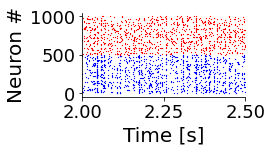

In [20]:
#Raster plot of spikes
scaling=0.75
fig, raster_plot = plt.subplots(1,1,figsize=(11.69/3*scaling, 16.54/8*scaling))

raster_plot.plot(var_t_e/1000, var_i_e, "b*", ms=0.7)
raster_plot.plot(var_t_i/1000, var_i_i+500, "r*", ms=0.7)
raster_plot.set_xbound([2,2.5])
raster_plot.set_xlabel("Time [s]", fontsize=20)
raster_plot.set_ylabel("Neuron #", fontsize=20)
raster_plot.set_yticks(np.arange(0,1100,500))
raster_plot.set_xticks(np.arange(2,2.6,0.25))
for tick in raster_plot.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in raster_plot.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)

sns.despine()

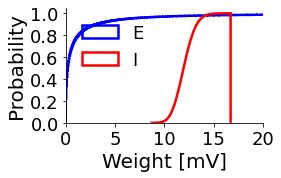

In [18]:
#Cumulative plot of weights; Note that highest values of excitatory weights outside of plot borders

#Concatenate weights into single array
excitatory_weights = var_weights[0][0][0]
inhibitory_weights = var_weights[0][0][2]
for i in range(n_runs-1):
    excitatory_weights = np.concatenate((excitatory_weights, var_weights[i+1][0][0]))
    inhibitory_weights = np.concatenate((inhibitory_weights, var_weights[i+1][0][2]))

scaling=0.86
#hist params
bins=10000
density=True
colours = ["b", "r"]
histtype="step"
xticks=np.arange(0,25,5)
yticks=np.arange(0,1.1,0.2)
linewidth = 2.5
stacked = True
cum = True

fig, axs = plt.subplots(1,1,figsize=(11.69/2.9*scaling, 16.54/6.5*scaling))

plt.tight_layout( w_pad=1.7, h_pad=3)
plt.rcParams['axes.labelsize'] = 20

axs.hist(excitatory_weights[excitatory_weights!=0], bins=bins, density=density, color=colours[0], histtype=histtype,
        linewidth=linewidth, label="E", stacked=stacked, cumulative=cum)
axs.hist(inhibitory_weights[inhibitory_weights!=0], bins=bins, density=density, color=colours[1], histtype=histtype,
        linewidth=linewidth, label="I", stacked=stacked, cumulative=cum)
axs.legend(fontsize=18, frameon=False)

axs.set_xlabel("Weight [mV]")
axs.set_ylabel("Probability")

axs.set_xticks(xticks)
axs.set_yticks(yticks)

for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
axs.set_xlim([0,20])
sns.despine()


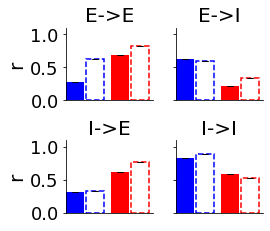

In [19]:
#Correlations after rewiring; Now excitatory rewiring has a larger impact

ex_cor = np.mean(var_cor_e, axis=2)
in_cor = np.mean(var_cor_i, axis=2)
ex_cor_std = np.std(var_cor_e, axis=2)
in_cor_std = np.std(var_cor_i, axis=2)

mean_ana_r_e = np.mean(var_ana_r_e, axis=1)
mean_ana_r_i = np.mean(var_ana_r_i, axis=1)
std_ana_r_e = np.std(var_ana_r_e, axis=1)
std_ana_r_i = np.std(var_ana_r_i, axis=1)

scaling=0.86

fig, cor_plots = plt.subplots(2,2,figsize=(11.69/2.9*scaling, 16.54/4.5*scaling), sharex=True, sharey=True)

plt.tight_layout( w_pad=0.75, h_pad=3)
plt.rcParams['axes.labelsize'] = 20


#cor_plots params
gap=0.2
a_gap=0.05
width = [0.5, 0.5]
a_width=[0.5,0.5]
error_kw = {"lw":2}
capsize=3
align="edge"
ylim=[0,1.1]
yticks = np.arange(0,1.1, 0.5)
fc = (0,0,0,0)
ec = ["b", "r"]
ls="dashed"
lw=1.5
#positions of correlation plots
position_0 = 0
position_1 = position_0+width[0]+a_gap+a_width[0]+gap
positions = [position_0, position_1]
a_positions = [position_0+width[0]+a_gap, position_1+width[1]+a_gap]
xlim = [position_0, a_positions[1]+a_width[1]+0.1]
xticks=[]

cor_plots[0,0].bar(positions,[ex_cor[0][1], in_cor[0][1]], 
              yerr=[ex_cor_std[0][1], in_cor_std[0][1]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[0,0].bar(a_positions, [mean_ana_r_e[0], mean_ana_r_i[0]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[0], std_ana_r_i[0]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[0,0].set_ylim(ylim)
cor_plots[0,0].set_xlim(xlim)
cor_plots[0,0].set_yticks(yticks)
cor_plots[0,0].set_xticks(xticks)
cor_plots[0,0].set_title("E->E", fontsize=20)

cor_plots[0,1].bar(positions,[ex_cor[1][2], in_cor[1][2]], 
              yerr=[ex_cor_std[1][2], in_cor_std[1][2]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[0,1].bar(a_positions, [mean_ana_r_e[1], mean_ana_r_i[1]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[1], std_ana_r_i[1]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[0,1].set_ylim(ylim)
cor_plots[0,1].set_xlim(xlim)
cor_plots[0,1].set_title("E->I", fontsize=20)

cor_plots[1,0].bar(positions,[ex_cor[2][3], in_cor[2][3]], 
              yerr=[ex_cor_std[2][3], in_cor_std[2][3]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[1,0].bar(a_positions, [mean_ana_r_e[2], mean_ana_r_i[2]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[2], std_ana_r_i[2]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[1,0].set_ylim(ylim)
cor_plots[1,0].set_xlim(xlim)
cor_plots[1,0].set_title("I->E", fontsize=20)

cor_plots[1,1].bar(positions,[ex_cor[3][4], in_cor[3][4]], 
              yerr=[ex_cor_std[3][4], in_cor_std[3][4]], error_kw = error_kw, capsize=capsize,
              width  = width, color = ['b', 'r'], align = align)
cor_plots[1,1].bar(a_positions, [mean_ana_r_e[3], mean_ana_r_i[3]], facecolor=fc, edgecolor=ec, ls=ls, lw=lw,
                   yerr=[std_ana_r_e[3], std_ana_r_i[3]], error_kw = error_kw, capsize=capsize,
                  width=a_width, align=align)
cor_plots[1,1].set_ylim(ylim)
cor_plots[1,1].set_xlim(xlim)
cor_plots[1,1].set_title("I->I", fontsize=20)

for tick in cor_plots[0,0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in cor_plots[1,0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
cor_plots[0,0].set_ylabel("r", fontsize=20)
cor_plots[1,0].set_ylabel("r", fontsize=20)

sns.despine()

In [ ]:
#Violin plot of stats
var_stats[1,:] = np.sqrt(var_stats[1,:])
var_stats[3,:] = np.sqrt(var_stats[3,:])

scaling=0.86

fig, axes = plt.subplots(2,2, figsize=(11.69/2.9*scaling, 16.54/4.5*scaling))
plt.tight_layout( w_pad=5, h_pad=1)
plt.rcParams['axes.labelsize'] = 20

stat_pairs = [(4,5), (1,3), (6,7), (0,2)]
stat_labels = ["$\overline{CV}$", "STD of FR \n [Hz]", "$\overline{K}$", "$\overline{FR}$ [Hz]"]

quartile1, medians, quartile3 = np.percentile(var_stats, [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(np.sort(var_stats), quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]


colours = ["b", "r"]
#scatter plot params
g_scale = 0.05
s_color="k"
s_marker="o"
s_s=7


for i in range(4):
    idx = stat_pairs[i]
    w_min = [whiskers_min[idx[0]], whiskers_min[idx[1]]]
    w_max = [whiskers_max[idx[0]], whiskers_max[idx[1]]]
    vp = axes[i%2][int(i<2)].violinplot([var_stats[idx[0],:], var_stats[idx[1],:]], showextrema=False, showmedians=False, showmeans=False)
    for ii,pc in enumerate(vp["bodies"]):
        pc.set_facecolor(colours[ii])
        pc.set_alpha(0.75)
    axes[i%2][int(i<2)].set_ylabel(stat_labels[i])
    
    #plot medians
    axes[i%2][int(i<2)].plot([1,2], [medians[idx[0]], medians[idx[1]]], "*", color="white")
    #plot quartiles
    axes[i%2][int(i<2)].vlines([1,2], w_min, w_max, color='k', linestyle='-', lw=1.5)
    
    #plot individual results
    axes[i%2][int(i<2)].scatter(np.ones(len(var_stats[idx[0],:]))+np.random.normal(scale=g_scale, size=len(var_stats[idx[0],:])), 
                    var_stats[idx[0],:], color=s_color, marker=s_marker, s=s_s)
    axes[i%2][int(i<2)].scatter(np.ones(len(var_stats[idx[1],:]))*2+np.random.normal(scale=g_scale, size=len(var_stats[idx[1],:])), 
                    var_stats[idx[1],:], color=s_color, marker=s_marker, s=s_s)
    axes[i%2][int(i<2)].set_xticks([])

    for tick in axes[i%2][int(i<2)].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    
    
axes[0,1].set_yticks([0.7,0.8,0.9])
axes[0,1].axhline(0.8, c="k", linestyle="--", lw=2.5)

axes[0,0].set_yticks([0,0.1,0.2])
axes[0,0].axhline(0.15, c="k", linestyle="--", lw=2.5)

axes[1,0].set_yticks([float(3.0), 3.5,4.0,5.0])
axes[1,1].set_yticks([3,5,7,9])


sns.despine()